In [1]:
import numpy as np
import pandas as pd
import datetime
import os
import matplotlib.pyplot as plt
import time

# 1 数据读取
 - 每秒所有采集数据放置在一行，数据间用空格分隔，不同类型数据（例如空间变位的三个方向、风速和风向）之间用逗号分隔

#### 1.1 读入数据

In [7]:
# 读取数据，返回dataframe格式
def readFile(path):
    return pd.read_csv(path)
path = r"..\数据\浦仪夹江大桥数据4.27\主跨跨中横向加速度LFA-G-H-14.csv"
df = readFile(path)
df = df[:-1]

In [8]:
df.head()

,测点编号,采集时间,加速度
0,LFA-G-H-14,2021-04-27 19:00:00,-8.858331612178258E-4 -7.087239197322301E-4 -1...
1,LFA-G-H-14,2021-04-27 19:00:01,4.305743745395116E-4 -6.249964237213135E-4 -0....
2,LFA-G-H-14,2021-04-27 19:00:02,3.234829221452986E-4 0.001478440420968192 2.37...
3,LFA-G-H-14,2021-04-27 19:00:03,-0.001569390403372901 -0.0013234783496175494 -...
4,LFA-G-H-14,2021-04-27 19:00:04,0.002006305115563529 0.00249664272580828 -5.79...


In [9]:
df.tail()

,测点编号,采集时间,加速度
162381,LFA-G-H-14,2021-04-29 18:59:45,0.001012445241212845 4.763688359941755E-6 0.00...
162382,LFA-G-H-14,2021-04-29 18:59:46,-3.081832613263812E-4 9.8506041935512E-5 2.443...
162383,LFA-G-H-14,2021-04-29 18:59:47,2.5837762015206475E-5 -5.4017135075160436E-5 3...
162384,LFA-G-H-14,2021-04-29 18:59:48,2.8086027928761074E-4 3.448366054466793E-4 -0....
162385,LFA-G-H-14,2021-04-29 18:59:49,6.196653204304832E-4 -9.60733209337507E-5 -0.0...


#### 1.2  数据校验

In [10]:
# 数据类型转换
def change_datatype(df):
    df["加速度"] = df["加速度"].apply(lambda x: np.array(x.split(" "), dtype = float))
    df["采集时间"] = df["采集时间"].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
    return df
df = change_datatype(df)
df.head()

,测点编号,采集时间,加速度
0,LFA-G-H-14,2021-04-27 19:00:00,"[-0.0008858331612178258, -0.000708723919732230..."
1,LFA-G-H-14,2021-04-27 19:00:01,"[0.0004305743745395116, -0.0006249964237213135..."
2,LFA-G-H-14,2021-04-27 19:00:02,"[0.0003234829221452986, 0.001478440420968192, ..."
3,LFA-G-H-14,2021-04-27 19:00:03,"[-0.001569390403372901, -0.0013234783496175494..."
4,LFA-G-H-14,2021-04-27 19:00:04,"[0.002006305115563529, 0.00249664272580828, -0..."


In [11]:
def data_verification(df):
    #统计每秒钟内的采样频率
    df["每秒采样频率"] = df["加速度"].apply(lambda x: len(x))
    print(df["每秒采样频率"].describe() ,"\n")
    
    # 校验每小时漏采或多采的情况
    tmp_Series = df["采集时间"].apply(lambda x: x.strftime("%Y-%m-%d %H时")).value_counts()
    tmp_Series.index = [datetime.datetime.strptime(x[:-1],'%Y-%m-%d %H') for x in tmp_Series.index]
    tmp_Series = tmp_Series - 60*60  #（正常情况下有3600条数据）
    print(tmp_Series)
    tmp_Series = tmp_Series.sort_index()

    plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
    plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
    plt.figure (figsize= (15,4))
    plt.bar(x = tmp_Series.index[:-2], height = tmp_Series.values[:-2], width = 0.041)
    plt.xlabel("Time",fontsize='10')
    plt.ylabel("Bias",fontsize='10')
    plt.title("每小时漏采或多采的情况",fontsize='20')
    plt.plot()

count    162386.000000
mean         19.999988
std           0.003509
min          19.000000
25%          20.000000
50%          20.000000
75%          20.000000
max          20.000000
Name: 每秒采样频率, dtype: float64 

2021-04-29 09:00:00       1
2021-04-28 05:00:00       1
2021-04-28 03:00:00       1
2021-04-28 17:00:00       0
2021-04-28 01:00:00       0
2021-04-27 21:00:00       0
2021-04-28 09:00:00       0
2021-04-29 11:00:00       0
2021-04-27 19:00:00       0
2021-04-28 23:00:00       0
2021-04-28 13:00:00       0
2021-04-29 05:00:00       0
2021-04-29 13:00:00       0
2021-04-28 21:00:00       0
2021-04-28 19:00:00       0
2021-04-28 07:00:00       0
2021-04-29 01:00:00       0
2021-04-29 03:00:00       0
2021-04-29 07:00:00       0
2021-04-28 11:00:00       0
2021-04-28 15:00:00       0
2021-04-27 23:00:00      -1
2021-04-27 22:00:00      -2
2021-04-29 10:00:00      -2
2021-04-28 10:00:00      -2
2021-04-28 00:00:00      -2
2021-04-28 12:00:00      -3
2021-04-27 20:00:00      -3
2

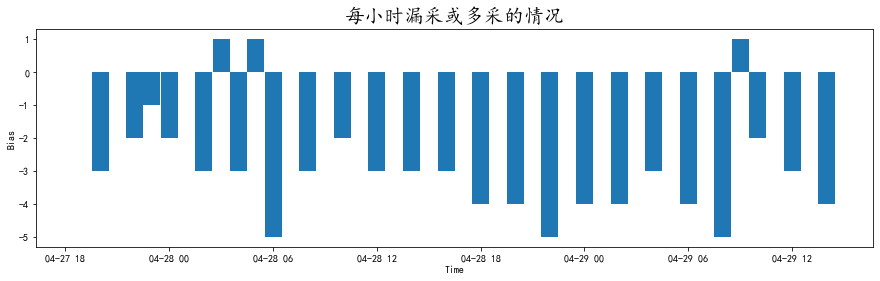

In [12]:
data_verification(df)

 - 采样频率为20，但个别秒存在少采的情况
 - 采样时间以一秒为单位增加，每小时应该存在7200条数据，但实际上存在偏差，特别是4.29日 15点的数据

# 2 数据预处理
 - 针对数据校验的结果，对数据进行进一步处理

#### 2.1 数据展开

In [13]:
df.sort_values(by="采集时间",axis=0,ascending=True,inplace=True)
df.drop_duplicates(subset=['采集时间'], keep='first', inplace=True)
df.reset_index(inplace=True)
del df['index']

In [14]:
df.head()

,测点编号,采集时间,加速度,每秒采样频率
0,LFA-G-H-14,2021-04-27 19:00:00,"[-0.0008858331612178258, -0.000708723919732230...",20
1,LFA-G-H-14,2021-04-27 19:00:01,"[0.0004305743745395116, -0.0006249964237213135...",20
2,LFA-G-H-14,2021-04-27 19:00:02,"[0.0003234829221452986, 0.001478440420968192, ...",20
3,LFA-G-H-14,2021-04-27 19:00:03,"[-0.001569390403372901, -0.0013234783496175494...",20
4,LFA-G-H-14,2021-04-27 19:00:04,"[0.002006305115563529, 0.00249664272580828, -0...",20


In [15]:
##############################################################
# @desc: 对数据的每一行进行处理，返回dataframe
##############################################################
def produce_unit(x):
    # 生成时间序列
    time_list = pd.date_range(start=x["采集时间"], periods=20, freq='50ms')
    # 生成加速度序列
    accl_list = x["加速度"]
    if len(accl_list) < 20:
        nan_list = np.full(20-len(accl_list), np.nan)
        accl_list = np.append(accl_list,nan_list)
    return pd.DataFrame({'采集时间':time_list,'加速度':accl_list})
    
##############################################################
# @desc: 对数据的每一行进行处理，返回dataframe
# @dependencies: produce_unit
##############################################################
def prepossessing(df):
    intermediary = df.apply(lambda x: produce_unit(x), axis = 1, result_type = 'reduce')  # intermediary是一个Seriess，但每个数据是一个dataFrame
    result = intermediary[0]   # 初始化
    for i in range(1, len(intermediary)):
        # 判断是否不连续
        intervel = (intermediary[i]["采集时间"][0] - intermediary[i-1]["采集时间"][0]).seconds
        if (intervel > 1):
            adding = pd.DataFrame(
                {'采集时间':pd.date_range(start=intermediary[i-1]["采集时间"][0] + datetime.timedelta(minutes=1), periods=int(intervel -1)*20, freq='50ms'),
                 '加速度':np.full(int(intervel-1)*20, np.nan)
                }
            ) 
            result = pd.concat([result,adding,intermediary[i]])
        else:
            result = pd.concat([result,intermediary[i]])
    result.reset_index(inplace = True)
    del result['index']
    return result

In [16]:
disposed_df = df.copy()
disposed_df = prepossessing(disposed_df)

In [17]:
disposed_df.to_csv('..\数据\浦仪夹江大桥数据4.27\disposed\跨中横向加速度.csv')

#### 2.2 归一化

In [5]:
disposed_df = pd.read_csv('..\数据\浦仪夹江大桥数据5.4\disposed\跨中横向加速度.csv',index_col=False)
del disposed_df['Unnamed: 0']
del disposed_df['index']

#def normalization(df,columns=[]):
#     for col in columns:
#         df[columns] = df[columns] / (df[columns].max() - df[columns].min())
#     return df

# cols = ['加速度']
# disposed_df = normalization(disposed_df,cols)

In [6]:
disposed_df

,采集时间,加速度
0,2021-05-04 00:00:00.000,-0.000469
1,2021-05-04 00:00:00.050,0.000745
2,2021-05-04 00:00:00.100,0.000229
3,2021-05-04 00:00:00.150,-0.000129
4,2021-05-04 00:00:00.200,0.000131
...,...,...
3455875,2021-05-05 23:59:53.750,0.006838
3455876,2021-05-05 23:59:53.800,0.007363
3455877,2021-05-05 23:59:53.850,0.003324
3455878,2021-05-05 23:59:53.900,-0.000498


#### 2.3 原始数据绘图

In [4]:
disposed_df['采集时间'] = disposed_df["采集时间"].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S.%f')) 
disposed_df.index = disposed_df['采集时间']

Text(0.5, 1.0, '横向加速度')

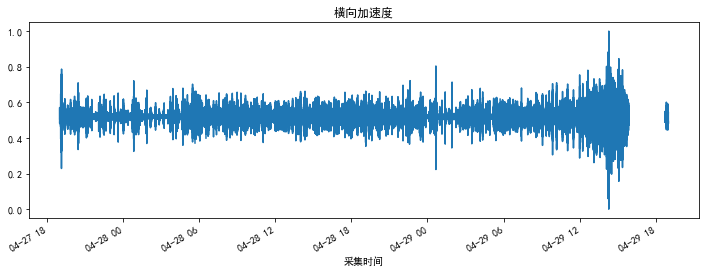

In [5]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

disposed_df['加速度'].plot(figsize=(12,4))
plt.title('横向加速度')

# 2 数据分析

#### 2.1 以十分钟为单位划分数据集
 - 计算窗体时间内的标准差、平均值

In [7]:
############################################################
# @desc：获取窗体时间内的统计值
# @param：
#     df：数据集
#     interval：窗体事件(/s)
############################################################
def get_stats(df, interval = 60*10, freq = 20):
    df["class"] = np.array(df.index.values / (freq*interval), dtype=int)
    result = df.groupby('class').agg({'采集时间':min, '加速度':[np.mean,np.std]}) 
    result.columns = ['采集时间','横向加速度平均值','横向加速度标准差']
    return result

In [8]:
stats = get_stats(disposed_df, interval = 60*10, freq = 20)

In [9]:
stats

,采集时间,横向加速度平均值,横向加速度标准差
class,,,
0,2021-05-04 00:00:00.000,-5.286044e-07,0.000548
1,2021-05-04 00:10:00.000,-6.984094e-07,0.000602
2,2021-05-04 00:20:00.000,-3.475067e-07,0.000574
3,2021-05-04 00:30:00.000,-7.408822e-07,0.000489
4,2021-05-04 00:40:00.000,9.069384e-08,0.000711
...,...,...,...
283,2021-05-05 23:10:00.000,3.088523e-06,0.000796
284,2021-05-05 23:20:01.000,1.410612e-06,0.001078
285,2021-05-05 23:30:00.000,1.010159e-05,0.001008


In [10]:
stats.to_csv('..\数据\浦仪夹江大桥数据5.4\processed_data\跨中横向加速度统计值.csv')